In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

----

<b>1. Загрузите данных в dataframe</b>

In [2]:

mall_data = pd.read_csv("Mall_Customers.csv")

# Просмотр первых строк
print(mall_data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40




 <b>2. Выводим статистическую информацию о наборе данных</b>

In [3]:
# Статистическая информация
print(mall_data.describe())

# Статистика по нечисловым данным
print(mall_data.describe(include=['O']))

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
         Genre
count      200
unique       2
top     Female
freq       112


<b> 3.Выводим название строк и столбцов</b>

In [4]:
# Названия столбцов
print("Столбцы:", mall_data.columns)

# Вывести индексы строк
print("Индексы строк:", mall_data.index)

Столбцы: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Индексы строк: RangeIndex(start=0, stop=200, step=1)


**4. Заменяем категориальные данные количественными:**




In [5]:
# Замена категориальных данных
mall_data['Genre'] = mall_data['Genre'].map({'Male': 0, 'Female': 1})

# Проверим изменения
print(mall_data.head())


   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      0   19                  15                      39
1           2      0   21                  15                      81
2           3      1   20                  16                       6
3           4      1   23                  16                      77
4           5      1   31                  17                      40


<b> 5. Визуализация данных с помощью Matplotlib и Seaborn</b>

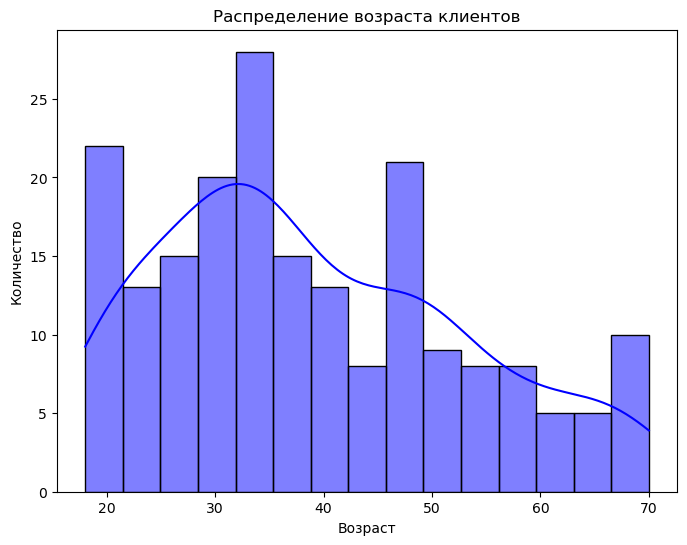

In [6]:
# Визуализация распределения возраста клиентов
plt.figure(figsize=(8, 6))
sns.histplot(mall_data['Age'], bins=15, kde=True, color='blue')
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()


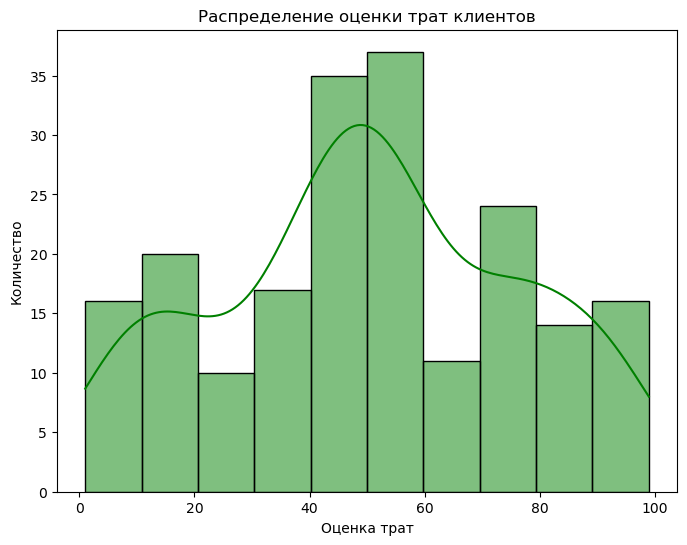

In [7]:
# Распределение оценки трат клиентов
plt.figure(figsize=(8, 6))
sns.histplot(mall_data['Spending Score (1-100)'], bins=10, kde=True, color='green')
plt.title('Распределение оценки трат клиентов')
plt.xlabel('Оценка трат')
plt.ylabel('Количество')
plt.show()

**Групповые визуализации**

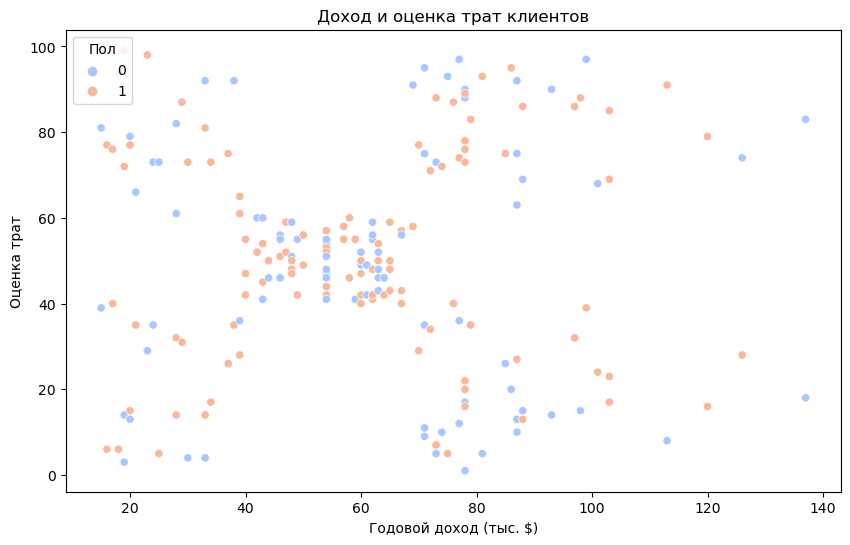

In [8]:
# Взаимосвязь дохода и оценок трат
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=mall_data, palette='coolwarm')
plt.title('Доход и оценка трат клиентов')
plt.xlabel('Годовой доход (тыс. $)')
plt.ylabel('Оценка трат')
plt.legend(title='Пол', loc='upper left')
plt.show()


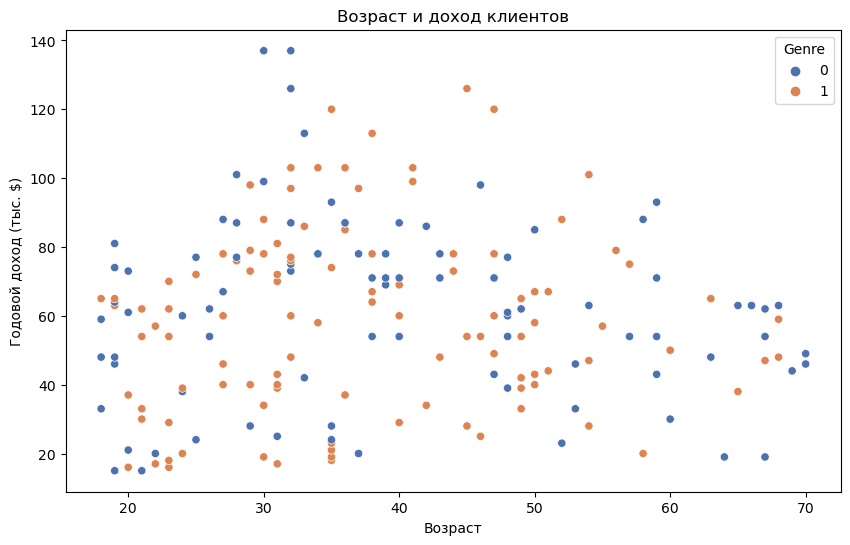

In [9]:
# Визуализация зависимости дохода и возраста
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=mall_data, palette='deep')
plt.title('Возраст и доход клиентов')
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. $)')
plt.show()

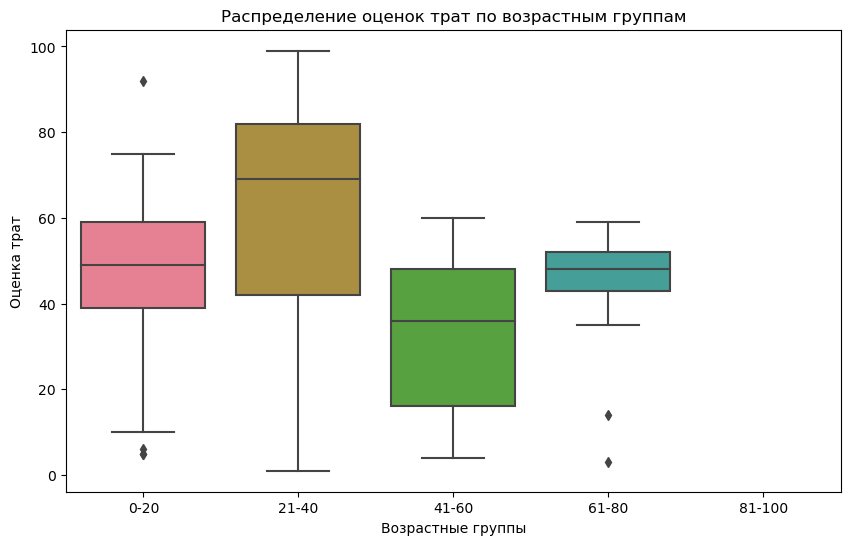

In [10]:
# Распределение оценки трат по возрастным группам
# Создание более широких возрастных групп
mall_data['Age_group'] = pd.cut(mall_data['Age'], 
                                bins=[0, 20, 40, 60, 80, 100], 
                                labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='Spending Score (1-100)', data=mall_data)
plt.title('Распределение оценок трат по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Оценка трат')
plt.show()

**Разделяем набор данных**

In [11]:
# Выбираем признаки и целевую переменную
X = mall_data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = mall_data['Age_group']

# Преобразуем категориальные значения целевой переменной в числовые
le = LabelEncoder()
y = le.fit_transform(y)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Обучение и выбор оптимальной модели**


In [12]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.885714 (0.079539)
LDA: 0.928571 (0.078246)
KNN: 0.828571 (0.085714)
CART: 1.000000 (0.000000)
NB: 0.985714 (0.028571)
SVC: 0.850000 (0.081127)


Classification and Regression Trees и метод ближайших соседей показали лучшие метрики, но деревья сильно лучше (ни одной ошибки), так что будем рассматривать их

In [13]:
# Создаем и обучаем модель CART
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = cart_model.predict(X_test)

cart_accuracy = accuracy_score(y_test, y_pred)
print(f'CART Model Accuracy: {cart_accuracy:.2f}')
print(f'CART Model Prediction: {y_pred[:5]}')
print('CART Transformed Features', X_test[:5].T, sep='\n')

CART Model Accuracy: 0.97
CART Model Prediction: [2 1 1 1 1]
CART Transformed Features
[[ 0.8660254  -1.15470054  0.8660254   0.8660254  -1.15470054]
 [ 1.11453339 -0.49340844 -0.75067913 -0.49340844 -0.94363215]
 [ 1.5737059   1.5737059   1.63093157  1.63093157  1.68815724]
 [-2.07577888  1.9925628  -0.45768844  1.71517587 -1.75216079]]


**Визуализируем решение**

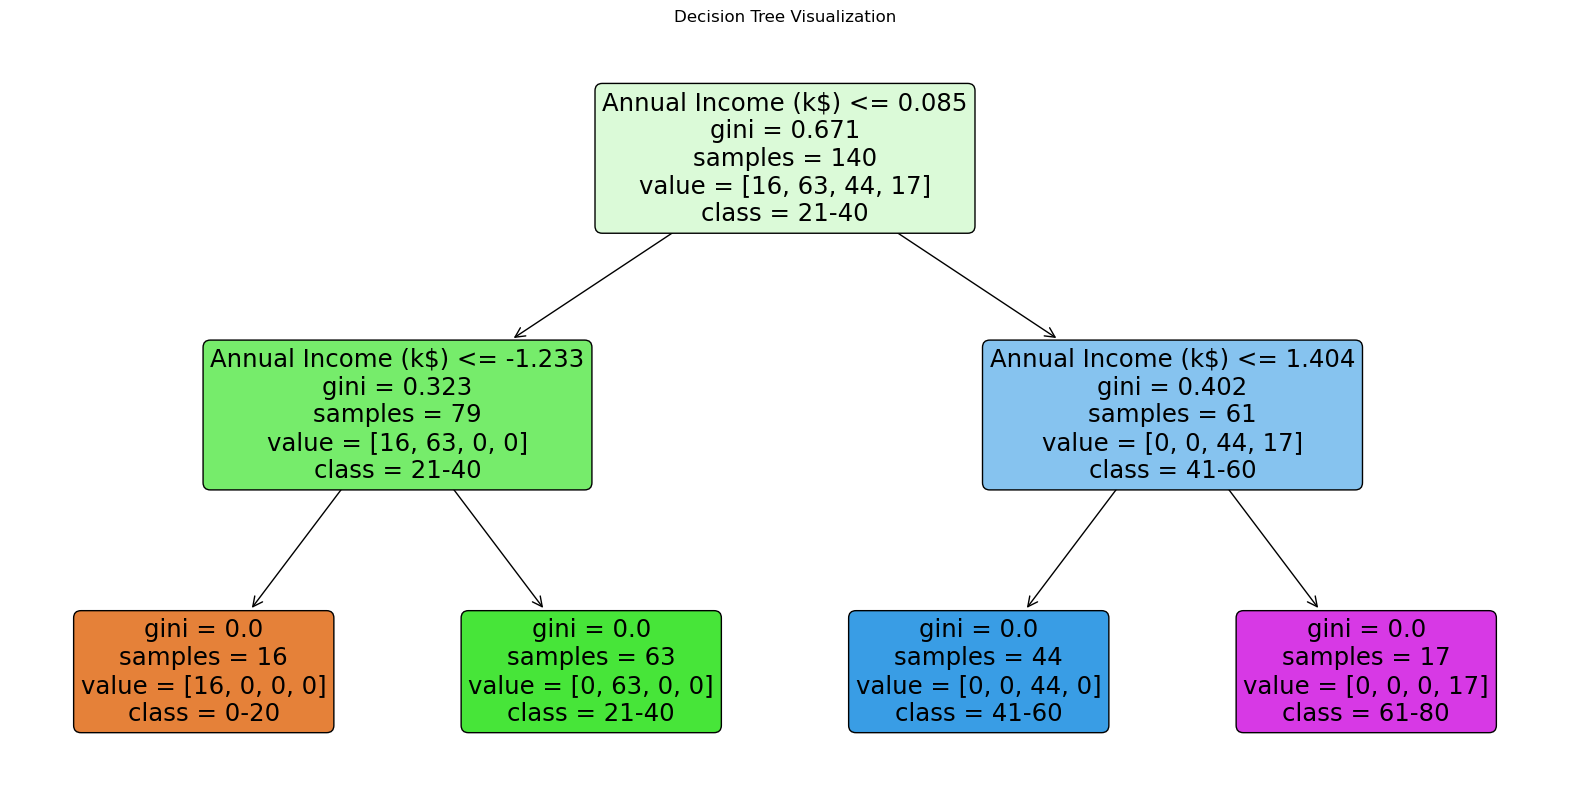

In [14]:
class_names = list(le.classes_)

# Визуализируем дерево решений
plt.figure(figsize=(20, 10))
tree.plot_tree(cart_model, feature_names=['Gender', 'Annual Income (k$)', 'Spending Score (1-100)'],
               class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

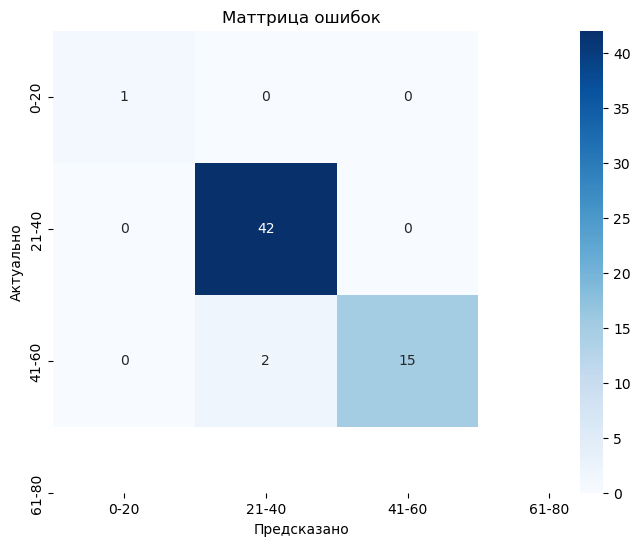

In [16]:
# Строим матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Маттрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Актуально')
plt.show()